1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow import keras
from keras import layers

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)


2. Load Dataset

In [6]:
# If using HuggingFace dataset:
from datasets import load_dataset

dataset = load_dataset("Adilbai/stock-dataset")  # ~620k rows
df = dataset['train'].to_pandas()

print(df.shape)
df.head()
print(df.info())

(620095, 73)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620095 entries, 0 to 620094
Data columns (total 73 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 620095 non-null  object 
 1   Open                 620095 non-null  float64
 2   High                 620095 non-null  float64
 3   Low                  620095 non-null  float64
 4   Close                620095 non-null  float64
 5   Volume               620095 non-null  int64  
 6   Dividends            620095 non-null  float64
 7   Stock Splits         620095 non-null  float64
 8   Ticker               620095 non-null  object 
 9   SMA_5                620095 non-null  float64
 10  SMA_10               620095 non-null  float64
 11  SMA_20               620095 non-null  float64
 12  SMA_50               620095 non-null  float64
 13  EMA_12               620095 non-null  float64
 14  EMA_26               620095 non-null  float64
 15  MACD

3. Explore Data

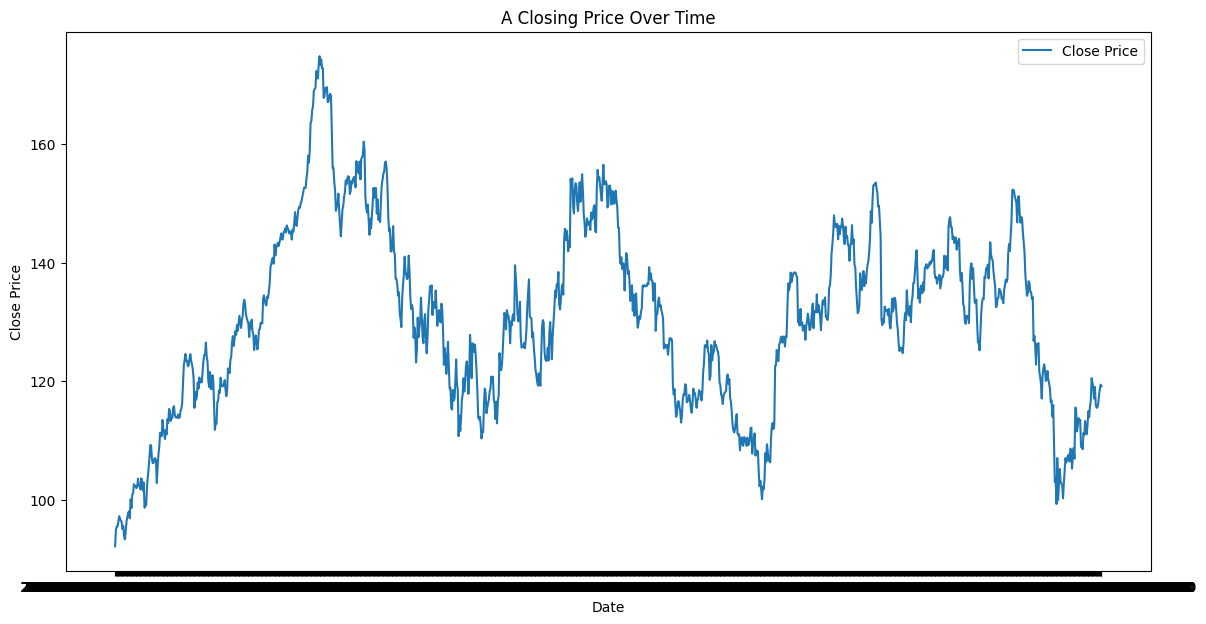

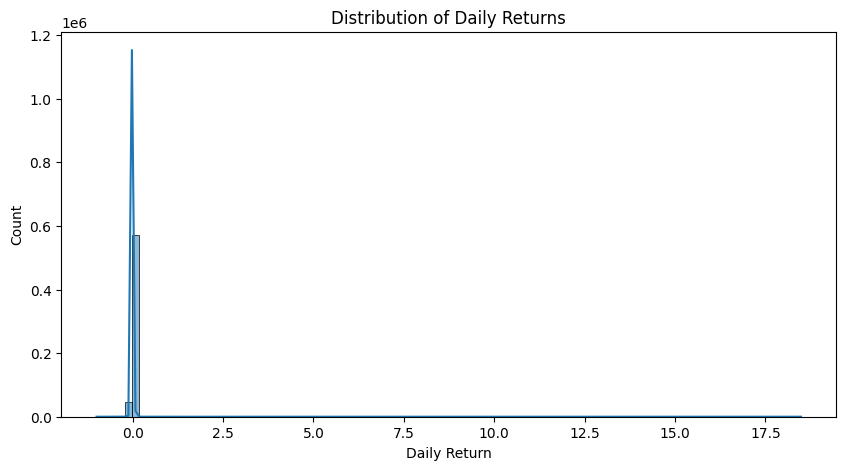

In [10]:
ticker = df['Ticker'].unique()[0]
sample = df[df['Ticker'] == ticker].sort_values('Date')

plt.figure(figsize=(14, 7))
plt.plot(sample['Date'], sample['Close'], label='Close Price')
plt.title(f"{ticker} Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

df['return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 5))
sns.histplot(df['return'].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.show()